# Group A: 

Zhilin Liu zl2819, Chenhao Su cs5828, Yuhan Zhao yz5633, Zibin Zhen zz883

## 1. Environment setup and data import

* raw data: ``data``

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import libraries

In [3]:
mypath = '../data/decadata_monthly_store_isin.csv'
data = pd.read_csv(mypath)
data.head()

,ourmonth,store,ISIN,cnt,sum_dollar
0,2017-01-01,105d2d9dd58f37a447d362d466c9d8cae32a88ba,BE0974293251,677,9128.25
1,2017-01-01,105d2d9dd58f37a447d362d466c9d8cae32a88ba,GB0002374006,875,17597.14
2,2017-01-01,105d2d9dd58f37a447d362d466c9d8cae32a88ba,US1912161007,591,909.54
3,2017-01-01,105d2d9dd58f37a447d362d466c9d8cae32a88ba,US60871R2094,313,3850.87
4,2017-01-01,105d2d9dd58f37a447d362d466c9d8cae32a88ba,US61174X1090,16,64.98


## 2. Aggregate data on ourmonth and store

In [4]:
agg_df = pd.DataFrame(data.groupby(['ourmonth','store']).sum_dollar.sum())
agg_df

sum_dollar
ourmonth   store                                               
2017-01-01 105d2d9dd58f37a447d362d466c9d8cae32a88ba    31651.28
           10bad95de098e4823d3cfb4ec2b7406725d35215   467802.36
           10c63e23a4e6c2c9c5ceb8ce0d8090c30ab6775c   209269.60
           10d2a05bd4d4e03e306902209f9260a71f2a8615   127334.89
           11383182f75059f68240bc8c4a476e95645632b8    40102.40
...                                                         ...
2018-12-01 ff400b4888fe521a4ba7e5924b8b7f2c238345e    277510.03
           ff54d085bcda3727af4952d734b0f7788c3c4542   911026.55
           ff869707c585427f5a1150e6acdbb2edfff045d3   375173.13
           ff9f1d354cdf9f934fa01785aa55da664c8d6abb   511302.86
           ffad7e6e367e59e62bb359da11339f8ccda2e58c   303795.23

[22019 rows x 1 columns]

## 3. Use total sales (sum_dollar) amount as key indicator
* ``pivot_df``
        column: ourmonth as datetime
        index: store
        value: sum of sum_dollar for each store at that ourmonth

In [5]:
pivot_df = pd.pivot_table(data, values='sum_dollar', index = ['store'], columns=['ourmonth'], aggfunc = np.sum)
pivot_df.columns = pd.to_datetime(pivot_df.columns)
pivot_df

ourmonth,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,...,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01
store,,,,,,,,,,,,,,,,,,,,,
105d2d9dd58f37a447d362d466c9d8cae32a88ba,31651.28,31767.06,37704.24,35791.28,38352.32,35244.08,37637.64,35785.36,41828.68,40839.85,...,40338.92,33283.24,36916.98,37170.83,37798.02,36644.10,35992.74,37972.63,36883.63,43118.09
10bad95de098e4823d3cfb4ec2b7406725d35215,467802.36,419333.44,441175.29,460365.55,468365.82,438106.79,465921.97,445713.97,481015.35,462720.35,...,456120.27,440636.62,464842.55,439298.76,459225.86,483097.55,491398.74,471640.61,495777.69,501185.89
10c63e23a4e6c2c9c5ceb8ce0d8090c30ab6775c,209269.60,202267.40,208563.74,218970.61,203567.51,204382.12,216139.89,193568.69,238173.26,205710.35,...,190869.98,195933.66,199899.34,205296.43,206541.90,203149.67,196796.23,186802.60,195795.89,193017.27
10d2a05bd4d4e03e306902209f9260a71f2a8615,127334.89,122242.92,139786.71,149012.97,113855.57,79704.62,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11383182f75059f68240bc8c4a476e95645632b8,40102.40,38068.24,45343.11,40756.33,40260.53,36873.16,34980.14,35784.50,38902.79,34961.04,...,42974.88,38504.87,37408.94,37172.82,38081.88,37641.53,36732.83,35715.15,39996.23,49153.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff400b4888fe521a4ba7e5924b8b7f2c238345e,273345.19,267015.12,297611.16,297222.73,304229.49,278237.57,291352.25,290775.68,307719.22,263989.10,...,294639.72,291248.70,286008.08,279915.15,290902.92,294840.28,290386.52,288142.02,277990.16,277510.03
ff54d085bcda3727af4952d734b0f7788c3c4542,772378.82,700761.68,737716.37,726213.64,680502.07,662624.63,691645.82,791705.37,767076.10,824583.33,...,820743.71,756105.07,783742.63,772826.10,823901.51,880164.30,894365.51,917729.23,928068.38,911026.55
ff869707c585427f5a1150e6acdbb2edfff045d3,368118.86,329472.33,360162.12,356905.92,363795.23,341811.27,349646.97,346859.72,352203.30,340862.91,...,347561.70,327225.28,351210.67,342858.78,340589.46,338668.22,353383.50,342063.64,350652.62,375173.13


## 4. Remove outliers
### Remove month outlier for each store:
For this problem, we dedicate with a Python package called <a href="https://arundo-adtk.readthedocs-hosted.com/en/stable/index.html" title="ADTK">Anomaly Detection Toolkei (ADTK)</a>. This package is for unsupervised / rule-based time series anomaly detection. 

Three different detectors from this package are applied as below. 
* QuantileAD
* GeneralizedESDTestAD
* AutoregressionAD

**Note that, only when a data point is detected by 2 or more methods, we classify it as an month outlier.**

In [6]:
from adtk.detector import QuantileAD
from adtk.detector import GeneralizedESDTestAD
from adtk.detector import AutoregressionAD

#### Detector 1:
With QuantileAD, we detect time points when sum_dollar is above 99% percentile or below 2% percentile.

In [7]:
detector1 = QuantileAD(low=0.02, high=0.98)
res1 = detector1.fit_detect(pivot_df.T).T # Transpose to set date as index
res1 = res1.replace(to_replace = 1, value = 'True') 
res1 = res1.replace(to_replace = 0, value = 'False')
res1.head()

ourmonth,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,...,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01
105d2d9dd58f37a447d362d466c9d8cae32a88ba,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10bad95de098e4823d3cfb4ec2b7406725d35215,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10c63e23a4e6c2c9c5ceb8ce0d8090c30ab6775c,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
10d2a05bd4d4e03e306902209f9260a71f2a8615,False,False,False,True,False,True,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11383182f75059f68240bc8c4a476e95645632b8,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


#### Detector 2:
The 2nd detector, GeneralizedESTestAD, detects anomaly based on generalized extreme Studentized deviate (ESD) test.

We notice that the key assumption of generalized ESD test is that normal values follow an approximately normal distribution. However, for each series, we only have at most 24 data points, which is not enough for us to obtain an accurate estimation on the underlying distribution. Thus, we want to use this method in a more reservative way. 

In [8]:
detector2 = GeneralizedESDTestAD(alpha=0.05)
res2 = detector2.fit_detect(pivot_df.T).T
res2 = res2.replace(to_replace = 1, value = 'True') 
res2 = res2.replace(to_replace = 0, value = 'False')

#### Detector 3:
AutoregressionAD detects anomalous changes of autoregressive behavior in time series.

In [9]:
detector3 = AutoregressionAD(c=1.0)
pivot_m = pivot_df.T.resample('m').first()
res3 = detector3.fit_detect(pivot_m).T
res3 = res3.replace(to_replace = 1, value = 'True') 
res3 = res3.replace(to_replace = 0, value = 'False')
res3.columns = res1.columns

#### Aggregate results from 3 detectors: 
For each data point, the number in its corresponding cell indicates the time it is detected as an outlier. 

In [10]:
def numeralized(val):
    num = 0 if val == 'False' else 1
    return num
res1_prep = res1.applymap(numeralized)
res2_prep = res2.applymap(numeralized)
res3_prep = res3.applymap(numeralized)
res_agg = res1_prep.add(res2_prep).add(res3_prep)
res_agg.head()

ourmonth,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,...,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01
105d2d9dd58f37a447d362d466c9d8cae32a88ba,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10bad95de098e4823d3cfb4ec2b7406725d35215,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10c63e23a4e6c2c9c5ceb8ce0d8090c30ab6775c,1,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
10d2a05bd4d4e03e306902209f9260a71f2a8615,1,0,0,1,0,1,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
11383182f75059f68240bc8c4a476e95645632b8,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2


#### Remove outlier store months that are detected as an outlier more than twice:
* Deleting: replacing with ``np.NaN``
* Result: ``cleaned_df``

In [11]:
original_df = pivot_df.copy(deep = True)
rules_df = res_agg.copy()
cleaned_df = original_df.where(rules_df < 2, np.NaN)
cleaned_df

ourmonth,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,...,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01
store,,,,,,,,,,,,,,,,,,,,,
105d2d9dd58f37a447d362d466c9d8cae32a88ba,31651.28,31767.06,37704.24,35791.28,38352.32,35244.08,37637.64,35785.36,41828.68,40839.85,...,40338.92,33283.24,36916.98,37170.83,37798.02,36644.10,35992.74,37972.63,36883.63,43118.09
10bad95de098e4823d3cfb4ec2b7406725d35215,467802.36,419333.44,441175.29,460365.55,468365.82,438106.79,465921.97,445713.97,481015.35,462720.35,...,456120.27,440636.62,464842.55,439298.76,459225.86,483097.55,491398.74,471640.61,495777.69,501185.89
10c63e23a4e6c2c9c5ceb8ce0d8090c30ab6775c,209269.60,202267.40,208563.74,218970.61,203567.51,204382.12,216139.89,193568.69,NaN,205710.35,...,190869.98,195933.66,199899.34,205296.43,206541.90,203149.67,196796.23,186802.60,195795.89,193017.27
10d2a05bd4d4e03e306902209f9260a71f2a8615,127334.89,122242.92,139786.71,149012.97,113855.57,79704.62,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11383182f75059f68240bc8c4a476e95645632b8,40102.40,38068.24,45343.11,40756.33,40260.53,36873.16,34980.14,35784.50,38902.79,34961.04,...,42974.88,38504.87,37408.94,37172.82,38081.88,37641.53,36732.83,35715.15,39996.23,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ff400b4888fe521a4ba7e5924b8b7f2c238345e,273345.19,267015.12,297611.16,297222.73,304229.49,278237.57,291352.25,290775.68,NaN,NaN,...,294639.72,291248.70,286008.08,279915.15,290902.92,294840.28,290386.52,288142.02,277990.16,277510.03
ff54d085bcda3727af4952d734b0f7788c3c4542,772378.82,700761.68,737716.37,726213.64,680502.07,662624.63,691645.82,791705.37,767076.10,824583.33,...,820743.71,756105.07,783742.63,772826.10,823901.51,880164.30,894365.51,917729.23,928068.38,911026.55
ff869707c585427f5a1150e6acdbb2edfff045d3,368118.86,329472.33,360162.12,356905.92,363795.23,341811.27,349646.97,346859.72,352203.30,340862.91,...,347561.70,327225.28,351210.67,342858.78,340589.46,338668.22,353383.50,342063.64,350652.62,375173.13


### Remove outlier stores:

We identify outlier stores based on the propostion of missing values in that store.

Note that, in practice, when we have time series that are long enough (e.g. daily data from 2017 to 2018), we want to identify a store outlier who has more than, say 20% missing values. However, in this assignment, we are working on a monthly dataset where for each store we only have no more than 24 data points. Since we do not want to lose too much data that might be valuable for further usage, we take the following rule with a threshold of 50% to identify outlier stores: 

* If the store is **lacking more than 50% data, it will be detected as an outlier**



In [12]:
num_month = len(pivot_df.columns)
ptg = 0.5
print('There are', num_month, 'months')
os = [idx for idx, row in cleaned_df.iterrows() if np.count_nonzero(~np.isnan(row)) <= num_month*ptg]
print(f"There are {len(os)} stores with less than {ptg*100}% data points, and hence marked as store outliers.")
data_cleaned = cleaned_df.drop(os, inplace=False)

There are 24 months
There are 71 stores with less than 50.0% data points, and hence marked as store outliers.


#### After two adjustments above, we get the cleaned data (outliers removed)

In [13]:
data_cleaned.head()

ourmonth,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,...,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01
store,,,,,,,,,,,,,,,,,,,,,
105d2d9dd58f37a447d362d466c9d8cae32a88ba,31651.28,31767.06,37704.24,35791.28,38352.32,35244.08,37637.64,35785.36,41828.68,40839.85,...,40338.92,33283.24,36916.98,37170.83,37798.02,36644.10,35992.74,37972.63,36883.63,43118.09
10bad95de098e4823d3cfb4ec2b7406725d35215,467802.36,419333.44,441175.29,460365.55,468365.82,438106.79,465921.97,445713.97,481015.35,462720.35,...,456120.27,440636.62,464842.55,439298.76,459225.86,483097.55,491398.74,471640.61,495777.69,501185.89
10c63e23a4e6c2c9c5ceb8ce0d8090c30ab6775c,209269.60,202267.40,208563.74,218970.61,203567.51,204382.12,216139.89,193568.69,NaN,205710.35,...,190869.98,195933.66,199899.34,205296.43,206541.90,203149.67,196796.23,186802.60,195795.89,193017.27
11383182f75059f68240bc8c4a476e95645632b8,40102.40,38068.24,45343.11,40756.33,40260.53,36873.16,34980.14,35784.50,38902.79,34961.04,...,42974.88,38504.87,37408.94,37172.82,38081.88,37641.53,36732.83,35715.15,39996.23,NaN
11f953492e670239c526d3b60dc28aa48a1f892d,300754.73,270654.92,291487.38,288027.48,287544.56,277578.19,285358.90,272974.76,278161.90,262612.66,...,272502.64,269522.78,276889.02,267523.91,276927.06,272663.89,278685.88,261830.71,282144.10,303401.17


## 5. Imputation

For this part, we considered three categories of imputation techniques:

* simple imputation techniques such as filling missing positions with the mean over some rolling window
* use classical time series models such as ARIMA to perform prediction for each time series
* apply more advanced Machine Learning or Neural Network to train and fill

Again, we are now working on a limited-length dataset, so time series models and ML/NNs are too complex to give a reasonable and accurate result. Consequently, we examime two simple imputation techniques from sklearn package: SimpleImputer and InterativeImputer.

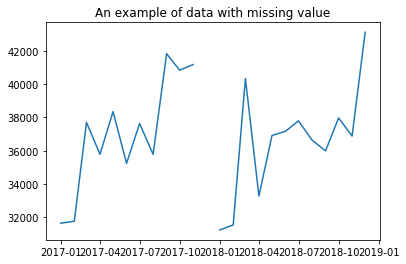

In [14]:
# draw one store for illustration
plt.title('An example of data with missing value')
plt.plot(data_cleaned[:1].T)
plt.show()

### Imputer 1: 
#### sklearn SimpleImputer

In a high level, there are two types of imputation algorithm in sklearn: Univariate and Multivariate.

SimpleImputer, as below, is one of the univariate ones, which imputes values in the i-th feature dimension using only non-missing values in that feature dimension. It provides basic strategies for imputing missing values. For example, missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. 

In [15]:
imputer = libraries.Imputer(data_cleaned)
# use python package to impute data. Codes for this part is in libraries.py
result_simple = imputer.SimpleImputer()

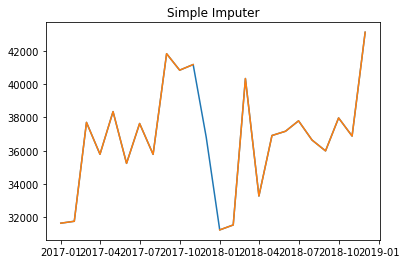

In [16]:
# draw pictures of imputation
plt.title('Simple Imputer')
plt.plot(result_simple.iloc[0])
plt.plot(data_cleaned.iloc[0])
plt.show()

### Imputer 2:
#### sklearn IterativeImputer

Another type is Multivariate feature imputation. One of approaches is to use the IterativeImputer class, which models each feature with missing values as a function of other features, and uses that estimate for imputation. It does so in an iterated round-robin fashion: at each step, a feature column is designated as output y and the other feature columns are treated as inputs X. A regressor is fit on (X, y) for known y. Then, the regressor is used to predict the missing values of y. This is done for each feature in an iterative fashion, and then is repeated for max_iter imputation rounds.

In [17]:
result_iterative = imputer.IterativeImputer()

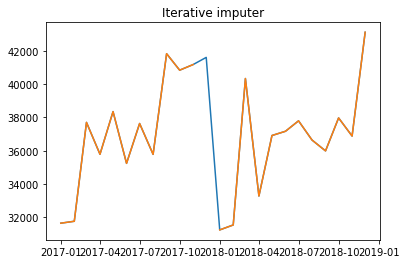

In [18]:
# visualize data after imputation
plt.title('Iterative imputer')
plt.plot(result_iterative.iloc[0])
plt.plot(data_cleaned.iloc[0])

plt.show()

### Imputer 3:
#### sklearn KNNImputer

The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach. By default, a euclidean distance metric that supports missing values, ``nan_euclidean_distances``, is used to find the nearest neighbors. Each missing feature is imputed using values from ``n_neighbors`` nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor. If a sample has more than one feature missing, then the neighbors for that sample can be different depending on the particular feature being imputed. 

In [19]:
result_knn = imputer.KnnImputer()

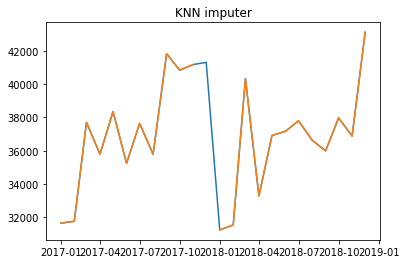

In [20]:
# visualize data after imputation
plt.title('KNN imputer')
plt.plot(result_knn.iloc[0])
plt.plot(data_cleaned.iloc[0])

plt.show()

### Validate whether we are correctly imputing the data? How to compare imputers?
### Imputation performance measure:

Cross Validation (train test split):

  - Randomly delete extra 10% data in chunks, and impute everything including the data artificially deleted, use these artifically deleted data to **cross validate** your performance on the imputation.
  (More details of deletion is introduced in the next ceil)
      - use **average chunk size of missing data** to be the chunk size we delete. 
      - randomly find a store, randomly to start with, and delete the block forward or backwards in a block of the size determined. 
      - Doing this until we delete 10% of data, these deleted data are the testing set, then use testing set to get our CV error

  - Use CV procedure to estimate our imputation error, compare imputors with resulting errors

#### Firstly, we decide the chunk size and number of chunks to delete.

In reality, we find that missing values are always next to each other.
Thus, to make the deletion similar to real missing, we delete continuous data.
That is to say, we delete a chunk at each time.
And the size of the chunk to be deleted
is the same as the size of the chunk of missing values.

In [21]:
df5 = data_cleaned.copy(deep=True)
temp = df5.fillna('missing')
all_cnt = []

# In the for loop below, we calculate the chunk size
for store, ts in zip(temp.index.values,temp.values):
    missing_count = ts.tolist().count('missing')
    cnts = []
    start = 0
    while start in range(len(ts)):
        if ts[start] == 'missing':
            count = 1
            # If a missing value is detected, we keep checking if the next value is still missing.
            # count is the number of missing values in the missing block.
            while start+1<24 and ts[start+1] == 'missing':
                count+=1
                start+=1
            cnts.append(count)
            start+=1
        else:
            start+=1
    all_cnt.append(cnts)

block_n = 0        
for ele in all_cnt:
    block_n+=len(ele)
print(f"Total numbers of missing chunks is {block_n}.")

missing_n = temp.values.flatten().tolist().count('missing')
print(f"Total numbers of missing values is {missing_n}.")
print(f'Average length of missing chunks is {round(missing_n/block_n)}.')

non_missing_n = data_cleaned.count(1).sum()
deleting_level = 0.1
print()
print(f'Delete extra 10% data, which is {int(non_missing_n*deleting_level)} data points.')
print(f'Therefore we need to randomly delete {int(non_missing_n*deleting_level/round(missing_n/block_n))} blocks.')

Total numbers of missing chunks is 1014.
Total numbers of missing values is 2273.
Average length of missing chunks is 2.

Delete extra 10% data, which is 2055 data points.
Therefore we need to randomly delete 1027 blocks.


#### Then, we choose mean absolute percentage error (MAPE) our error metric, for it is scale independent.

In [22]:
def MAPE(y_df: pd.DataFrame, y_hat_df: pd.DataFrame) -> float:
    """
    :param y_df: actual test data
    :param y_hat_df: predicted values
    :return: the MAPE of actual data and predicted data
    """
    pct_df =  np.abs(y_df - y_hat_df)/ np.abs(y_df)
    MAPE = pct_df.stack().mean()
    return MAPE

#### For each imputor, we implement a CV runner:
Logic:

Randomly delete data and use imputors to fill in the missing data. Calculate MAPE of imputed data and original data.

Then, repeat the process many times and calculate average MAPE.

The smaller the MAPE, the better the imputor.

In [23]:
def cross_validator(imputer:libraries.Imputer,impute_method,original_data,cv_times):
    """
    :param imputer: an instance of Imputer
    :param impute_method: input a function, imputor. This function will be tested.
    :param original_data: data
    :param cv_times: repeat many times and calcualte average MAPE
    :return: average MAPE for the imputor
    """
    error = np.zeros(cv_times)
    for i in range(cv_times):
        # randomly delete data
        deleted_df = libraries.deleter(original_data,0.1,missing_n,block_n)
        imputer.set_original_df(deleted_df.copy(deep=True))
        imputed_data = impute_method() # impute data
        error[i] = MAPE(original_data,imputed_data)
    return error

#### Here is our result printed:

In [24]:
imp = libraries.Imputer(data_cleaned)
err_SI = cross_validator(imp,imp.SimpleImputer,data_cleaned,10)
err_IT = cross_validator(imp,imp.IterativeImputer,data_cleaned,10)
err_KNN = cross_validator(imp,imp.KnnImputer,data_cleaned,10)
print('Error of SimpleImputer is %.6f' % (sum(err_SI)/len(err_SI)))
print('Error of IterativeImputer is %.6f' % (sum(err_IT)/len(err_IT)))
print('Error of KNN is %.6f' % (sum(err_KNN)/len(err_KNN)))

Error of SimpleImputer is 0.244762
Error of IterativeImputer is 0.013180
Error of KNN is 0.349964


#### The error of IterativeImputer is the smallest among the three imputers, so we use imputation result from it as the result.

In the cell below, we display the results after imputation:

In [25]:
result_iterative.head()

ourmonth,2017-01-01,2017-02-01,2017-03-01,2017-04-01,2017-05-01,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,...,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01,2018-08-01,2018-09-01,2018-10-01,2018-11-01,2018-12-01
store,,,,,,,,,,,,,,,,,,,,,
105d2d9dd58f37a447d362d466c9d8cae32a88ba,31651.28,31767.06,37704.24,35791.28,38352.32,35244.08,37637.64,35785.36,41828.680000,40839.85,...,40338.92,33283.24,36916.98,37170.83,37798.02,36644.10,35992.74,37972.63,36883.63,43118.09000
10bad95de098e4823d3cfb4ec2b7406725d35215,467802.36,419333.44,441175.29,460365.55,468365.82,438106.79,465921.97,445713.97,481015.350000,462720.35,...,456120.27,440636.62,464842.55,439298.76,459225.86,483097.55,491398.74,471640.61,495777.69,501185.89000
10c63e23a4e6c2c9c5ceb8ce0d8090c30ab6775c,209269.60,202267.40,208563.74,218970.61,203567.51,204382.12,216139.89,193568.69,220730.939019,205710.35,...,190869.98,195933.66,199899.34,205296.43,206541.90,203149.67,196796.23,186802.60,195795.89,193017.27000
11383182f75059f68240bc8c4a476e95645632b8,40102.40,38068.24,45343.11,40756.33,40260.53,36873.16,34980.14,35784.50,38902.790000,34961.04,...,42974.88,38504.87,37408.94,37172.82,38081.88,37641.53,36732.83,35715.15,39996.23,42964.92054
11f953492e670239c526d3b60dc28aa48a1f892d,300754.73,270654.92,291487.38,288027.48,287544.56,277578.19,285358.90,272974.76,278161.900000,262612.66,...,272502.64,269522.78,276889.02,267523.91,276927.06,272663.89,278685.88,261830.71,282144.10,303401.17000


## 6. Add ISIN to the aggregation

In [26]:
agg_df_2 = pd.DataFrame(data.groupby(['ourmonth','store','ISIN']).sum_dollar.sum())
agg_df_2.head()

sum_dollar
ourmonth   store                                    ISIN                    
2017-01-01 105d2d9dd58f37a447d362d466c9d8cae32a88ba BE0974293251     9128.25
                                                    GB0002374006    17597.14
                                                    US1912161007      909.54
                                                    US60871R2094     3850.87
                                                    US61174X1090       64.98

## 7. Repeat steps 3-5 above, predicting sub_dollar on an ourmonth, store and ISIN level. 

In [27]:
pivot_df_2 = pd.pivot_table(data, values='sum_dollar', index = ['store','ISIN'], \
                            columns=['ourmonth'], aggfunc = np.sum)
pivot_df_2.columns = pd.to_datetime(pivot_df_2.columns)
pivot_df_2.head()

ourmonth                                               2017-01-01  2017-02-01  \
store                                    ISIN                                   
105d2d9dd58f37a447d362d466c9d8cae32a88ba BE0974293251     9128.25     9182.21   
                                         GB0002374006    17597.14    17099.51   
                                         US1344291091         NaN        7.58   
                                         US1912161007      909.54      979.46   
                                         US49271V1008         NaN         NaN   

ourmonth                                               2017-03-01  2017-04-01  \
store                                    ISIN                                   
105d2d9dd58f37a447d362d466c9d8cae32a88ba BE0974293251    11344.08    11918.13   
                                         GB0002374006    20261.56    18055.61   
                                         US1344291091        7.58         NaN   
                                         US1912161007     1016.43     1063.86   
                                         US49271V1008         NaN         NaN   

ourmonth                                               2017-05-01  2017-06-01  \
store                                    ISIN                                   
105d2d9dd58f37a447d362d466c9d8cae32a88ba BE0974293251    12281.68    11246.68   
                                         GB0002374006    19759.00    18215.17   
                                         US1344291091        3.79       15.16   
                                         US1912161007     1153.61     1212.65   
                                         US49271V1008         NaN         NaN   

ourmonth                                               2017-07-01  2017-08-01  \
store                                    ISIN                                   
105d2d9dd58f37a447d362d466c9d8cae32a88ba BE0974293251    11421.27    11912.88   
                                         GB0002374006    19595.87    17794.69   
                                         US1344291091         NaN         NaN   
                                         US1912161007     1120.83     1043.13   
                                         US49271V1008         NaN         NaN   

ourmonth                                               2017-09-01  2017-10-01  \
store                                    ISIN                                   
105d2d9dd58f37a447d362d466c9d8cae32a88ba BE0974293251    13989.08    12718.01   
                                         GB0002374006    21032.17    21836.59   
                                         US1344291091       22.74        3.79   
                                         US1912161007     1225.32     1171.61   
                                         US49271V1008         NaN         NaN   

ourmonth                                               ...  2018-03-01  \
store                                    ISIN          ...               
105d2d9dd58f37a447d362d466c9d8cae32a88ba BE0974293251  ...    12894.58   
                                         GB0002374006  ...    20673.29   
                                         US1344291091  ...         NaN   
                                         US1912161007  ...     1231.11   
                                         US49271V1008  ...         NaN   

ourmonth                                               2018-04-01  2018-05-01  \
store                                    ISIN                                   
105d2d9dd58f37a447d362d466c9d8cae32a88ba BE0974293251    11390.53    12238.78   
                                         GB0002374006    15837.01    18809.83   
                                         US1344291091         NaN         NaN   
                                         US1912161007     1013.40     1133.63   
                                         US49271V1008         NaN         NaN   

ourmonth                                               2018-06-01  2018-0

Different from problem 5, we exclude the ISIN that has less than 50% of the data points before applying the detecting methods becasue some ISIN time series are very short, making some detecting methods not appropriate.

In [29]:
num_month = len(pivot_df_2.columns)
ptg = 0.5
print('There are', num_month, 'months')
os = [idx for idx, row in pivot_df_2.iterrows() if np.count_nonzero(~np.isnan(row)) <= num_month*ptg]
print(f"There are {len(os)} stores with less than {ptg*100}% data points, and hence marked as store outliers.")
pre_cleaned = pivot_df_2.drop(os, inplace=False)

There are 24 months
There are 3130 stores with less than 50.0% data points, and hence marked as store outliers.


For problem 7, we wrote a outlier_detector function, which used the 3 detector methods as shown in problem 4 and removes outlier ISIN months that are detected as an outlier more than twice. 

In [30]:
cleaned_df = libraries.outlier_detector(pre_cleaned)

In [31]:
cleaned_df.replace(0., np.nan, inplace=True)
cleaned_df.head()

ourmonth                                               2017-01-01  2017-02-01  \
store                                    ISIN                                   
105d2d9dd58f37a447d362d466c9d8cae32a88ba BE0974293251         NaN     9182.21   
                                         GB0002374006    17597.14    17099.51   
                                         US1912161007         NaN      979.46   
                                         US60871R2094         NaN     4331.12   
                                         US61174X1090       64.98       95.96   

ourmonth                                               2017-03-01  2017-04-01  \
store                                    ISIN                                   
105d2d9dd58f37a447d362d466c9d8cae32a88ba BE0974293251    11344.08    11918.13   
                                         GB0002374006    20261.56    18055.61   
                                         US1912161007     1016.43     1063.86   
                                         US60871R2094     4912.82     4626.35   
                                         US61174X1090       79.97       63.98   

ourmonth                                               2017-05-01  2017-06-01  \
store                                    ISIN                                   
105d2d9dd58f37a447d362d466c9d8cae32a88ba BE0974293251    12281.68    11246.68   
                                         GB0002374006    19759.00    18215.17   
                                         US1912161007     1153.61     1212.65   
                                         US60871R2094     4987.94     4382.97   
                                         US61174X1090       87.96       69.96   

ourmonth                                               2017-07-01  2017-08-01  \
store                                    ISIN                                   
105d2d9dd58f37a447d362d466c9d8cae32a88ba BE0974293251    11421.27    11912.88   
                                         GB0002374006    19595.87    17794.69   
                                         US1912161007     1120.83     1043.13   
                                         US60871R2094     5360.68     4836.19   
                                         US61174X1090       49.98       97.93   

ourmonth                                               2017-09-01  2017-10-01  \
store                                    ISIN                                   
105d2d9dd58f37a447d362d466c9d8cae32a88ba BE0974293251         NaN    12718.01   
                                         GB0002374006    21032.17    21836.59   
                                         US1912161007     1225.32     1171.61   
                                         US60871R2094     5348.70     4852.49   
                                         US61174X1090       87.95         NaN   

ourmonth                                               ...  2018-03-01  \
store                                    ISIN          ...               
105d2d9dd58f37a447d362d466c9d8cae32a88ba BE0974293251  ...    12894.58   
                                         GB0002374006  ...    20673.29   
                                         US1912161007  ...     1231.11   
                                         US60871R2094  ...     5376.84   
                                         US61174X1090  ...       63.99   

ourmonth                                               2018-04-01  2018-05-01  \
store                                    ISIN                                   
105d2d9dd58f37a447d362d466c9d8cae32a88ba BE0974293251    11390.53    12238.78   
                                         GB0002374006    15837.01    18809.83   
                                         US1912161007     1013.40     1133.63   
                                         US60871R2094     4784.96     4569.53   
                                         US61174X1090       93.96       67.68   

ourmonth                                               2018-06-01  2018-0

Imputation:

Here we use the same method as Question 5. We use three imputors: SimpleImputor,
IterativeImputor and KnnImputor respectively. And use the result with smallest error as our final result.


In [32]:
imp = libraries.Imputer(cleaned_df)
rel_iterative = imp.IterativeImputer()
rel_KNN = imp.KnnImputer()
miss_n,b_n = libraries.cal_chunk_size(cleaned_df)

Total numbers of missing chunks is 27541.
Total numbers of missing values is 61026.
Average length of missing chunks is 2.

To delete extra 10% data, which is 53947 data points, 
 therefore we need to randomly delete 26973 blocks.


In [33]:
np.random.seed(1)
err_SI =libraries.cross_validator_Q7(imp,imp.SimpleImputer,cleaned_df,10,miss_n,b_n)
err_IT = libraries.cross_validator_Q7(imp,imp.IterativeImputer,cleaned_df,10,miss_n,b_n)
err_K = libraries.cross_validator_Q7(imp,imp.KnnImputer,cleaned_df,10,miss_n,b_n)

In [34]:
print('Error of SimpleImputor is %.6f' % (sum(err_SI)/len(err_SI)))
print('Error of IterativeImputor is %.6f' % (sum(err_IT)/len(err_IT)))
print('Error of KnnImputer is %.6f' % (sum(err_K)/len(err_K)))

Error of SimpleImputor is 0.021654
Error of IterativeImputor is 0.035752
Error of KnnImputer is 0.014999


Error of Knn imputor is only 0.015.
Thus, the imputation result of Knn imputor will the final result.

In [35]:
print('Imputaion result: ')
rel_KNN.head()

Imputaion result: 


ourmonth                                               2017-01-01  2017-02-01  \
store                                    ISIN                                   
105d2d9dd58f37a447d362d466c9d8cae32a88ba BE0974293251   11306.040     9182.21   
                                         GB0002374006   17597.140    17099.51   
                                         US1912161007    1114.190      979.46   
                                         US60871R2094    4925.225     4331.12   
                                         US61174X1090      64.980       95.96   

ourmonth                                               2017-03-01  2017-04-01  \
store                                    ISIN                                   
105d2d9dd58f37a447d362d466c9d8cae32a88ba BE0974293251    11344.08    11918.13   
                                         GB0002374006    20261.56    18055.61   
                                         US1912161007     1016.43     1063.86   
                                         US60871R2094     4912.82     4626.35   
                                         US61174X1090       79.97       63.98   

ourmonth                                               2017-05-01  2017-06-01  \
store                                    ISIN                                   
105d2d9dd58f37a447d362d466c9d8cae32a88ba BE0974293251    12281.68    11246.68   
                                         GB0002374006    19759.00    18215.17   
                                         US1912161007     1153.61     1212.65   
                                         US60871R2094     4987.94     4382.97   
                                         US61174X1090       87.96       69.96   

ourmonth                                               2017-07-01  2017-08-01  \
store                                    ISIN                                   
105d2d9dd58f37a447d362d466c9d8cae32a88ba BE0974293251    11421.27    11912.88   
                                         GB0002374006    19595.87    17794.69   
                                         US1912161007     1120.83     1043.13   
                                         US60871R2094     5360.68     4836.19   
                                         US61174X1090       49.98       97.93   

ourmonth                                               2017-09-01  2017-10-01  \
store                                    ISIN                                   
105d2d9dd58f37a447d362d466c9d8cae32a88ba BE0974293251    12556.17    12718.01   
                                         GB0002374006    21032.17    21836.59   
                                         US1912161007     1225.32     1171.61   
                                         US60871R2094     5348.70     4852.49   
                                         US61174X1090       87.95       87.00   

ourmonth                                               ...  2018-03-01  \
store                                    ISIN          ...               
105d2d9dd58f37a447d362d466c9d8cae32a88ba BE0974293251  ...    12894.58   
                                         GB0002374006  ...    20673.29   
                                         US1912161007  ...     1231.11   
                                         US60871R2094  ...     5376.84   
                                         US61174X1090  ...       63.99   

ourmonth                                               2018-04-01  2018-05-01  \
store                                    ISIN                                   
105d2d9dd58f37a447d362d466c9d8cae32a88ba BE0974293251    11390.53    12238.78   
                                         GB0002374006    15837.01    18809.83   
                                         US1912161007     1013.40     1133.63   
                                         US60871R2094     4784.96     4569.53   
                                         US61174X1090       93.96       67.68   

ourmonth                                               2018-06-01  2018-0

## Potential Improvement:
    
When detecting outlier, we didn't look into the correlation among the same ISIN while sold in different stores. If correlation is considered, the outliers may be more precisely detected.